# Reading HDF-EOS data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [1]:
# first of all install h5py library from command line with pip install h5py 
# enable h5py 
import h5py 

# open the PRISMA file 
f = h5py.File('/mnt/c/Users/townend/Documents/data/PRISMA/PRS_L2D_STD_20210416191440_20210416191444_0001.he5', 'r') 

# reading name and value for root attributes (metadata contained in HDF5 root) 
for attribute in f.attrs: 
    print(attribute,f.attrs[attribute]) 

Acquisition_Purpose b'NOT SPECIAL PRODUCT'
Acquisition_Size b'30 Km'
Acquisition_Station b'CNM'
Acquisition_Type b'EARTH OBSERVATION'
Atm_LutGeomInfo_RelativeAzimuth ['RAA_050' 'RAA_085']
Atm_LutGeomInfo_SunZenith ['SZA_035' 'SZA_050']
Atm_LutGeomInfo_ViewZenith ['VZA_000' 'VZA_010']
Atm_Lut_version b'1.1.2'
Atmo_RTM_info b'MODTRAN6'
Atmo_profile_info b'ATM_MIDLAT_SUMMER'
Aux_SunEarthDistance b'PRS_AUX_D_SUN_20180201000000_21000101000000_0001.xml'
Aux_SunIrradiance b'PRS_AUX_S_IRR_20180201000000_21000101000000_0001.xml'
CNM_L2_BINNING 1
CNM_L2_BIN_ON 1
CNM_L2_BSEL_ON 0
CNM_L2_HGRP 1
CNM_PAN_ACQ 1
CNM_SWIR_ACQ 1
CNM_SWIR_SELECT [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
CNM_VNI

In [2]:
# reading names for all attributes (metadata) contained in HDF5 Groups 
# specific method for reading the values shall be built depending by the 
# specific metadata type (a single value, an array, a matrix, etc) 
def printname(name): 
    if isinstance(f[name] , h5py._hl.dataset.Dataset):
        print(name, f[name].shape)
    else:
        print(name)
    
f.visit(printname) 

HDFEOS
HDFEOS/SWATHS
HDFEOS/SWATHS/GCP attributes
HDFEOS/SWATHS/Geocoding attributes
HDFEOS/SWATHS/Geocoding attributes/Ancillary
HDFEOS/SWATHS/PRS_L2D_HCO
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR_Cube (1212, 173, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR_PIXEL_L2_ERR_MATRIX (1212, 173, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/VNIR_Cube (1212, 66, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/VNIR_PIXEL_L2_ERR_MATRIX (1212, 66, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Geocoding Model
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Latitude (1212, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Longitude (1212, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Time (1000, 1)
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields/Observing_Angle (1212, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields/Rel_Azimuth_Angle (1212, 1230)
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields/

In [3]:
# reading SWIR & VNIR datacubes; 
# adjust the “PRS_L1_HCO” string portion depending by the specific PRISMA 
# product type (e.g. for L2D product use PRS_L2D_HCO) 
swir = f['/HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR_Cube'] 
vnir = f['/HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/VNIR_Cube'] 
pco = f['/HDFEOS/SWATHS/PRS_L2D_PCO/Data Fields/Cube'] # panchromatic?
#pcr = f['/HDFEOS/SWATHS/PRS_L2D_PCR/Data Fields/Cube']
vnir.shape

(1212, 66, 1230)

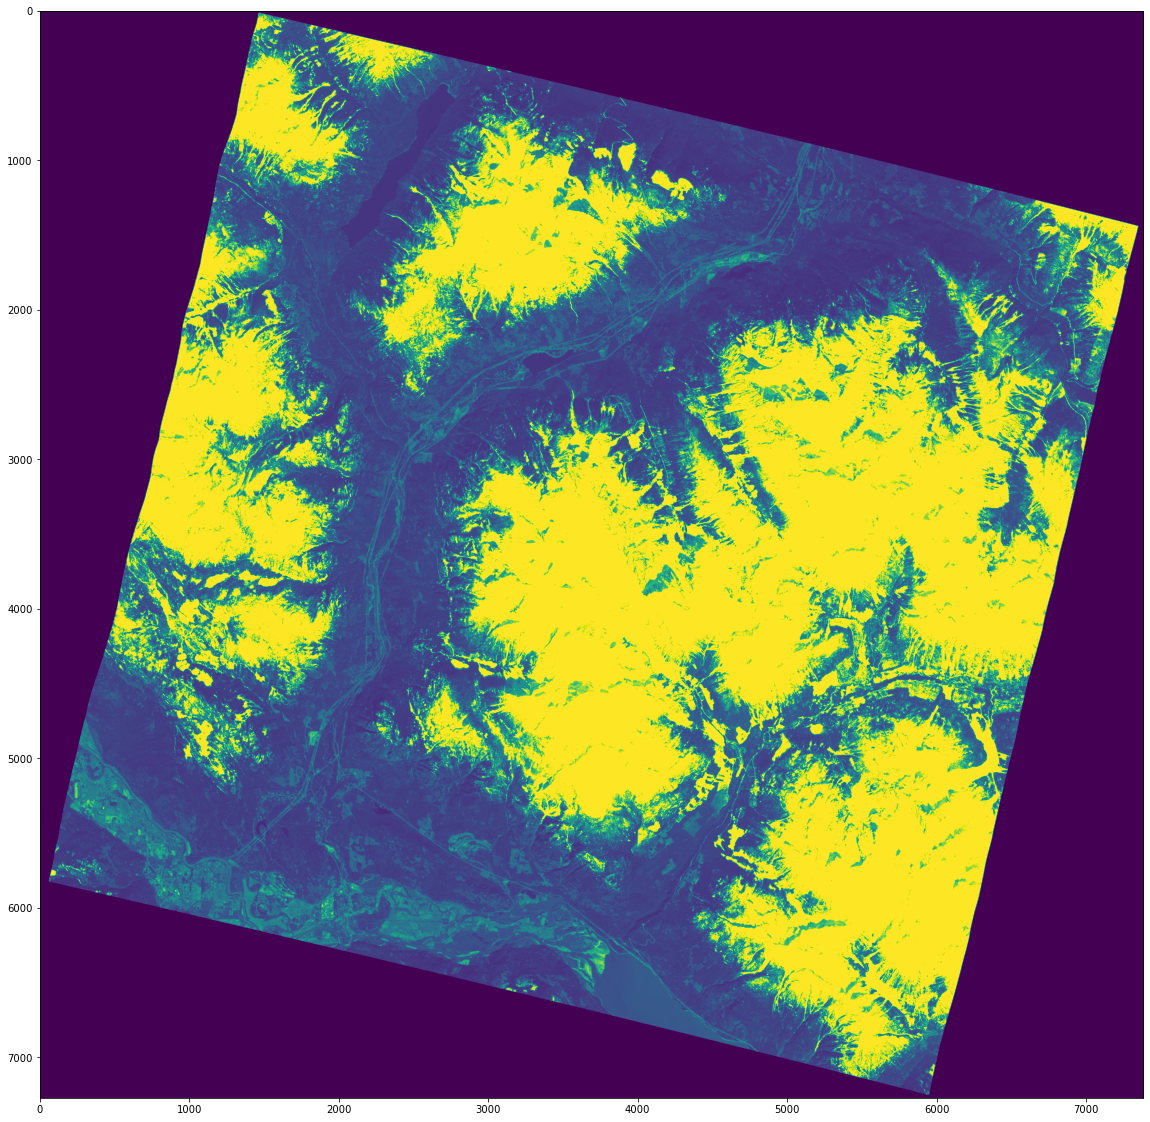

In [6]:
# check the panchromatic image
plt.figure(figsize=(20,20))
plt.imshow(pco)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


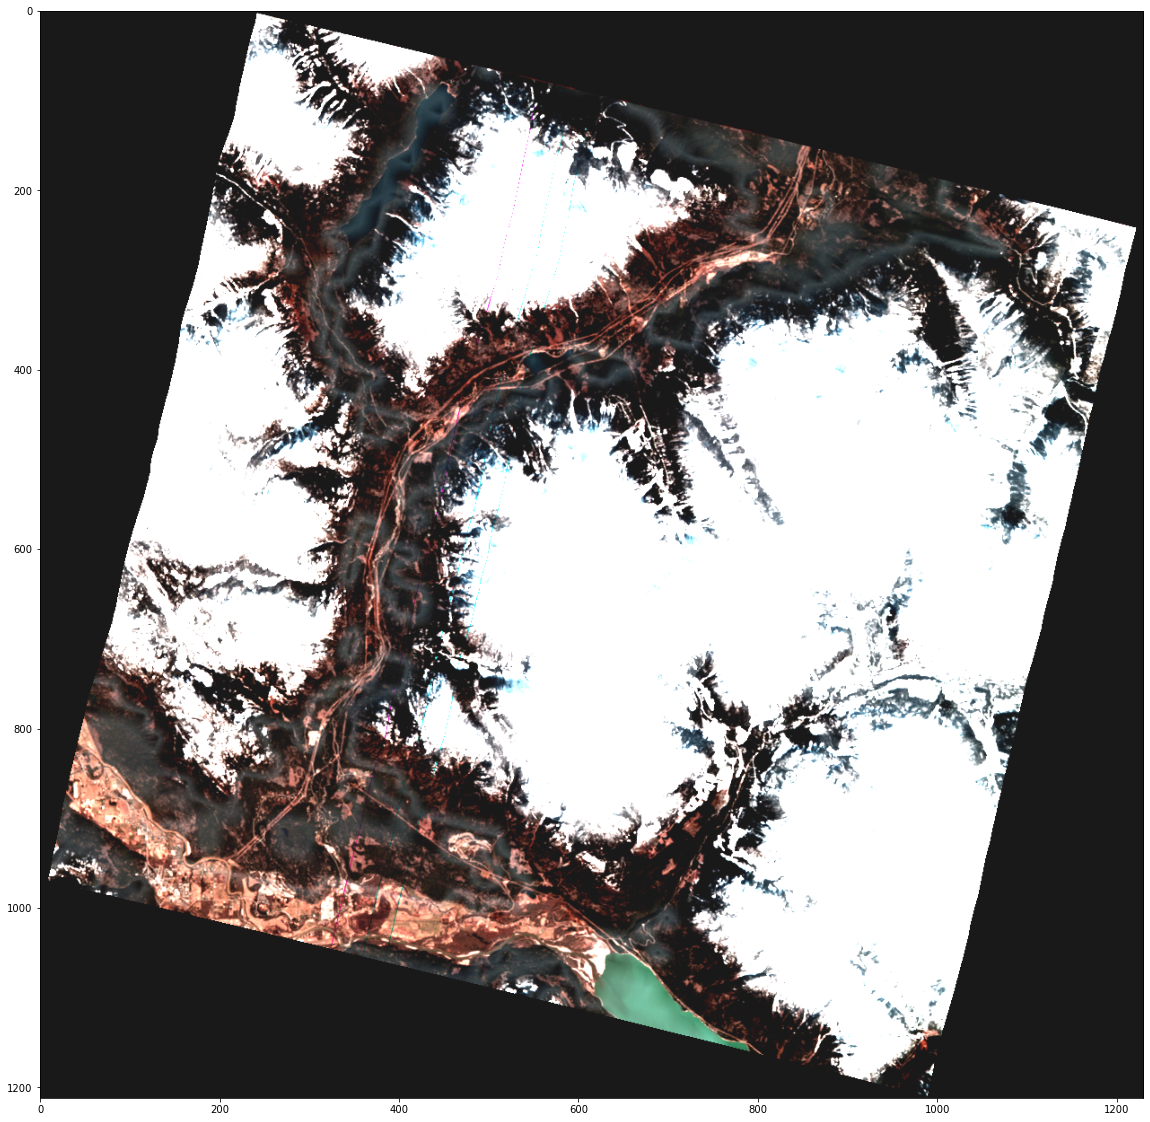

In [7]:
# check some hyperspectral imagery
plt.figure(figsize=(20,20))
img = vnir[:,[34,50,55],:].swapaxes(1,2)/(np.max(vnir)/10)
plt.imshow(img+(1-img)*0.1)

(array([3008360.,  234079.,  161554.,  147094.,  149974.,  150012.,
         146216.,  141716.,  135920.,  197355.]),
 array([    0. ,  6553.5, 13107. , 19660.5, 26214. , 32767.5, 39321. ,
        45874.5, 52428. , 58981.5, 65535. ]),
 <BarContainer object of 10 artists>)

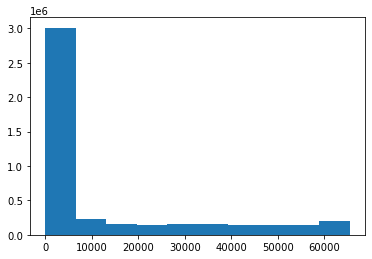

In [8]:
# check a spectral histogram
plt.hist(vnir[:,[34,50,55],:].flatten())

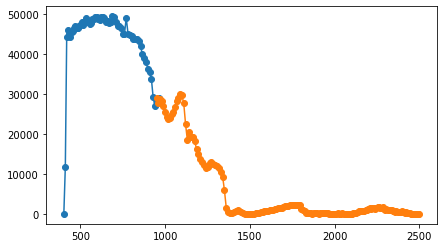

In [9]:
# check out one pixel's spectrum
plt.figure(figsize=(7,4))
plt.plot(f.attrs["List_Cw_Vnir"][3:], vnir[1000,3:,800], 'o-')
plt.plot(f.attrs["List_Cw_Swir"][:-3], swir[1000,:-3,800], '-o')

# Convert to Xarray

The PRISMA docs state that the data comes in HDF-EOS format. i.e. the HDF hierarchical structure to store imagery and metadata, but it cannot be read by NetCDF readers because (http://hdfeos.org/software/aug_eos5/HDFEOS5AugToolUsersGuide.pdf):
>Although the two HDF-EOS5 dimensions-XDim,YDim,and their dimension scales-can be retrieved from the HDF-EOS5 Library, they cannot be recognized by the netCDF-4 data model. Therefore, to the netCDF-4 library, the HDF-EOS5 dimension information is actually missing. The lack of dimension information to netCDF-4 is the main reason why netCDF-4 applications cannot read an HDF-EOS5 file by following the netCDF-4 data model.
>

HDF-EOS is same format that some other instruments such as TERRA deliver their data, but it doesn't seem common enough to have any useful Python tools available to deal with it, other than the general tools to deal with hdf-5 (h5py). This leaves me two options:

1. Find a tool to convert HDF-EOS to another format that we can deal with using Python tools (e.g. NetCDF), then use a prebuilt converter to xarray.
2. Write a conversion tool for HDF-EOS to xarray. I may not extract ALL info, but at least the geocoded imagery and pertinent metadata.

## Option 1

Option 1 would take least time, so let's try that first. There appears to be a tool to modify HDF5-EOS files so that they can be read by NetCDF4 readers: http://hdfeos.org/software/aug_hdfeos5.php This requires installation of HDF5 and HDF5-EOS libraries:

- https://www.hdfgroup.org/solutions/hdf5/
    - `sudo apt-get install libhdf5-serial-dev`
- https://www.hdfeos.org/software/library.php#HDF-EOS5
    - build guide: https://hdfeos.org/software/hdfeos.php
    - `./configure CC=/usr/bin/gcc`
    
Then run using the aug_eos5 binary:

`./aug_eos5 /mnt/c/Users/townend/Documents/data/PRISMA/PRS_L2D_STD_20201002193710_20201002193714_0001.he5`

However, it looks like the PRISMA is not using standard HDF-EOS attribute structure, so it can't calculate XDIM and YDIM:

```#000: EHapi.c line 8193 in HE5_EHattrcat(): No group/dataset named "/HDFEOS/ADDITIONAL/FILE_ATTRIBUTES" exists.```

And indeed, there is no `ADDITIONAL` folder in the PRISMA data. So it looks like we're stuck with option 2.

## Option 2

Convert the PRISMA file structure into an xarray dataset, then save as netCDF. 

- Attributes can be directly copied over
- Dataarrays need to be searched for in the file structure. Corresponding dimensions and coordinates need to be set by hand

In [10]:
import numpy as np
import pandas as pd 
import netCDF4
import xarray as xr
import h5py

In [11]:
# first of all install h5py library from command line with pip install h5py 
# enable h5py 
import h5py 

# open the PRISMA file 
fname_in = '/mnt/c/Users/townend/Documents/data/PRISMA/PRS_L2D_STD_20210416191440_20210416191444_0001.he5'
f = h5py.File(fname_in, 'r') 

In [12]:
# create empty dataset
ds = xr.Dataset()

In [13]:
# assign dataset attributes
for attribute in f.attrs: 
    attr = f.attrs[attribute]
    if isinstance(attr, np.bytes_):
        # string fields come as numpy.bytes_
        # conver to string for netCDF output
        ds.attrs[attribute] = attr.astype(str)
        
    elif isinstance(attr, np.ndarray) and attr.dtype == "object":
        # arrays of strings are held as numpy object dtype
        # convert these to lists of strings for netCDF output
        ds.attrs[attribute] = list(attr)
        
    elif isinstance(attr, np.ndarray) and attr.ndim > 1:
        # flatten multidimensional arrays to 1D for netCDF output
        ds.attrs[attribute] = attr.flatten()
        
    else:
        ds.attrs[attribute] = attr

In [14]:
# dictionary to map dimensions to each dataarray
dims_dict = {
    "HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR": 
    {"dims": ("y", "wl_swir", "x"), "coords": {"wl_swir":ds.attrs["List_Cw_Swir"]}},
    
    "HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/VNIR": 
    {"dims": ("y", "wl_vnir", "x"), "coords": {"wl_vnir":ds.attrs["List_Cw_Vnir"]}},
    
    "HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/L": {"dims": ("y", "x")},
    "Geolocation Fields/Time": {"dims": ("t", "1")},
    "HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields": {"dims": ("y", "x")},
    "HDFEOS/SWATHS/PRS_L2D_PCO/Data Fields": {"dims": ("y_pc", "x_pc")},
    "HDFEOS/SWATHS/PRS_L2D_PCO/Geolocation Fields/L": {"dims": ("y_pc", "x_pc")},
    "Info": {"dims": ("path", "1")},
    "Matrix": {"dims": ("t", "256")},
    "KDP_AUX/LOS_Swir": {"dims": ("t", "3")},
    "KDP_AUX/LOS_Vnir": {"dims": ("t", "3")},
       }

In [15]:
%%time
# create DataArray for each corresponding items in hierarchy

def create_DataArray(name): 
    if isinstance(f[name] , h5py._hl.dataset.Dataset): 
        for k in dims_dict.keys():
            if k in name:
                dims = dims_dict[k]
                print(name)
                # create the new dataarray
                # replace "/" with "-" for netCDF writing                
                ds[name.replace("/", "-")] = xr.DataArray(f[name][:], **dims)
    
f.visit(create_DataArray)
#ds = xr.open_dataset(fname_out)

HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR_Cube
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR_PIXEL_L2_ERR_MATRIX
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/VNIR_Cube
HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/VNIR_PIXEL_L2_ERR_MATRIX
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Latitude
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Longitude
HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Time
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields/Observing_Angle
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields/Rel_Azimuth_Angle
HDFEOS/SWATHS/PRS_L2D_HCO/Geometric Fields/Solar_Zenith_Angle
HDFEOS/SWATHS/PRS_L2D_PCO/Data Fields/Cube
HDFEOS/SWATHS/PRS_L2D_PCO/Data Fields/PIXEL_L2_ERR_MATRIX
HDFEOS/SWATHS/PRS_L2D_PCO/Geolocation Fields/Latitude
HDFEOS/SWATHS/PRS_L2D_PCO/Geolocation Fields/Longitude
HDFEOS/SWATHS/PRS_L2D_PCO/Geolocation Fields/Time
Info/Ancillary/GyroData/Gyro_1_data_angle
Info/Ancillary/GyroData/Gyro_1_data_byte
Info/Ancillary/GyroData/Gyro_2_data_angle
Info/Ancillary/GyroData/Gyro_2_data_byte
Info/Ancill

In [16]:
# save in netCDF format
fname_out = fname_in.replace('.he5', '.nc')
ds.to_netcdf(fname_out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CPU times: user 373 ms, sys: 224 ms, total: 598 ms
Wall time: 941 ms


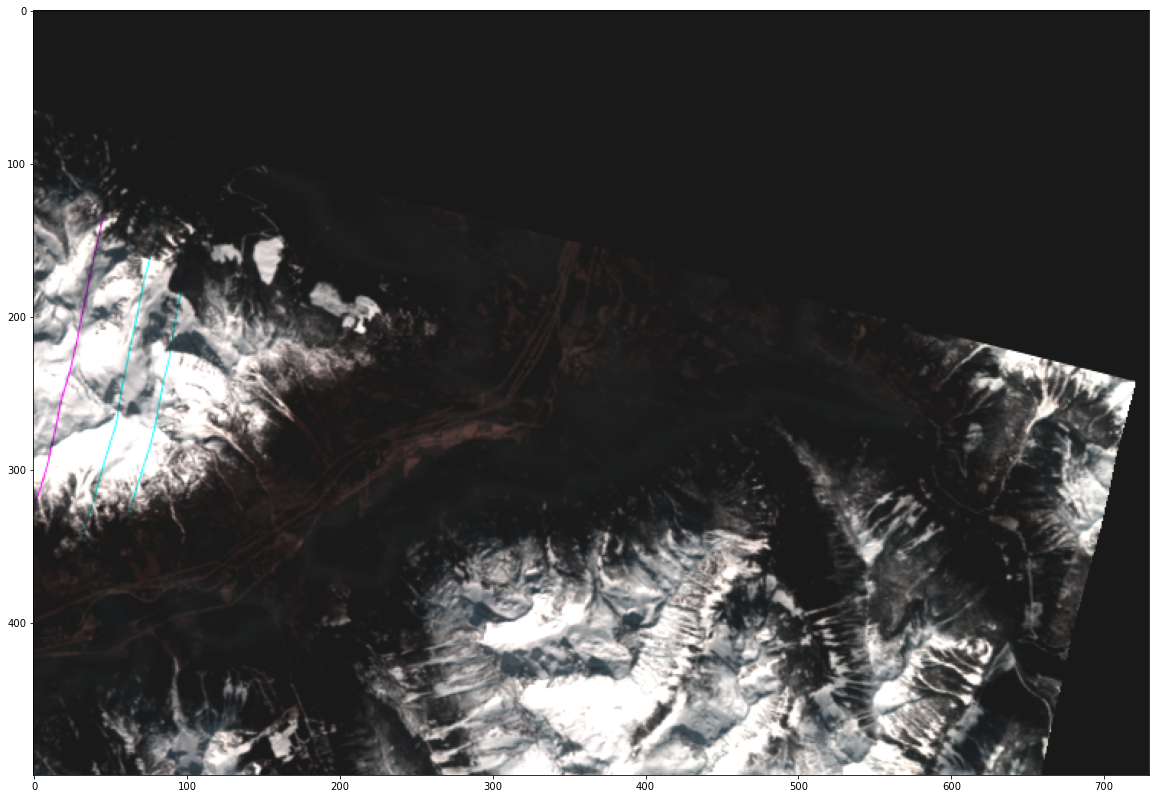

In [17]:
%%time
# read netCDF file using dask (parallel=True)
ds = xr.open_mfdataset(fname_out, engine="h5netcdf", parallel=True)

# check data is stored correctly
cube_name = "HDFEOS-SWATHS-PRS_L2D_HCO-Data Fields-VNIR_Cube"
plt.figure(figsize=(20,20))
img = ds[cube_name][:500,[34,50,55],500:].data.swapaxes(1,2)/55000
plt.imshow(img+(1-img)*0.1)

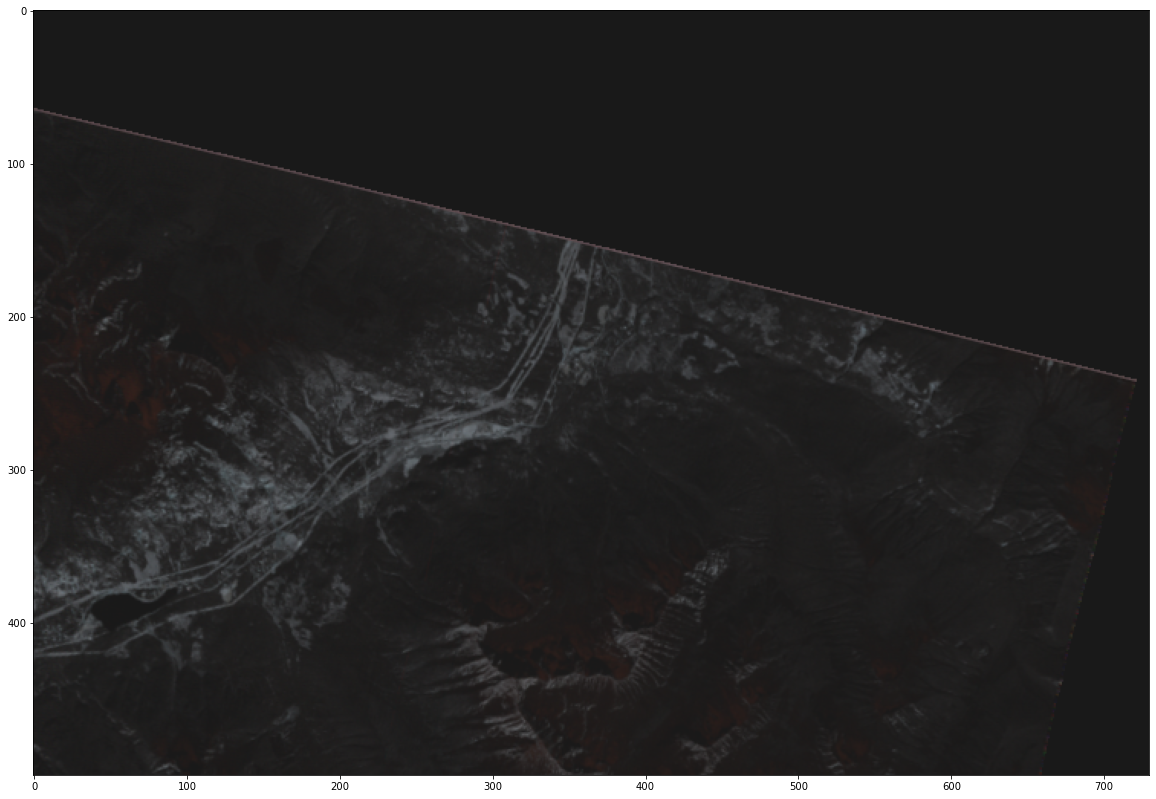

In [18]:
# check data is stored correctly
cube_name = "HDFEOS-SWATHS-PRS_L2D_HCO-Data Fields-SWIR_Cube"
plt.figure(figsize=(20,20))
img = ds[cube_name][:500,[34,50,55],500:].data.swapaxes(1,2)/55000
plt.imshow(img+(1-img)*0.1)